# Linear Regression
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andrychowanda/COMP6577/blob/master/COMP6577-2.ipynb)

Import required packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Load & profile the data

In [ ]:
!wget https://raw.githubusercontent.com/satosat/COMP6577/master/Car_Purchasing_Data.csv

--2021-12-11 13:11:56--  https://raw.githubusercontent.com/satosat/COMP6577/master/Car_Purchasing_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50244 (49K) [text/plain]
Saving to: ‘Car_Purchasing_Data.csv’

Car_Purchasing_Data 100%[===================>]  49.07K  --.-KB/s    in 0.001s  

2021-12-11 13:11:56 (53.6 MB/s) - ‘Car_Purchasing_Data.csv’ saved [50244/50244]



In [ ]:
userData = pd.read_csv("Car_Purchasing_Data.csv")
print(userData.dtypes)
print(userData.isna().values.any())

Customer Name           object
Customer e-mail         object
Country                 object
Gender                   int64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object
False


In [ ]:
print(userData.info())
print(userData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB
None
           Gender         Age  ...       Net Worth  Car Purchase Amount
count  500.000000  500.000000  ...      500.000000           500.000000
mean     0.506000   46.224000  ...   431475.713625         44209.799218
std      0.500465    7.990339  ...   173536.756340         107

Select particular column, and visualise the data (histogram)

   Age  Annual Salary  Credit Card Debt    Net Worth  Car Purchase Amount
0   42    62812.09301      11609.380910  238961.2505          35321.45877
1   41    66646.89292       9572.957136  530973.9078          45115.52566
2   43    53798.55112      11160.355060  638467.1773          42925.70921
3   58    79370.03798      14426.164850  548599.0524          67422.36313
4   57    59729.15130       5358.712177  560304.0671          55915.46248


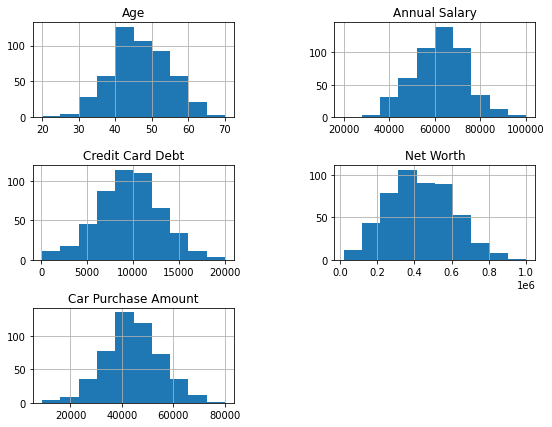

In [ ]:
newuserData = userData[["Age", "Annual Salary", "Credit Card Debt", "Net Worth", "Car Purchase Amount"]]
print(newuserData.head())
newuserData.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise the data (Scatter)

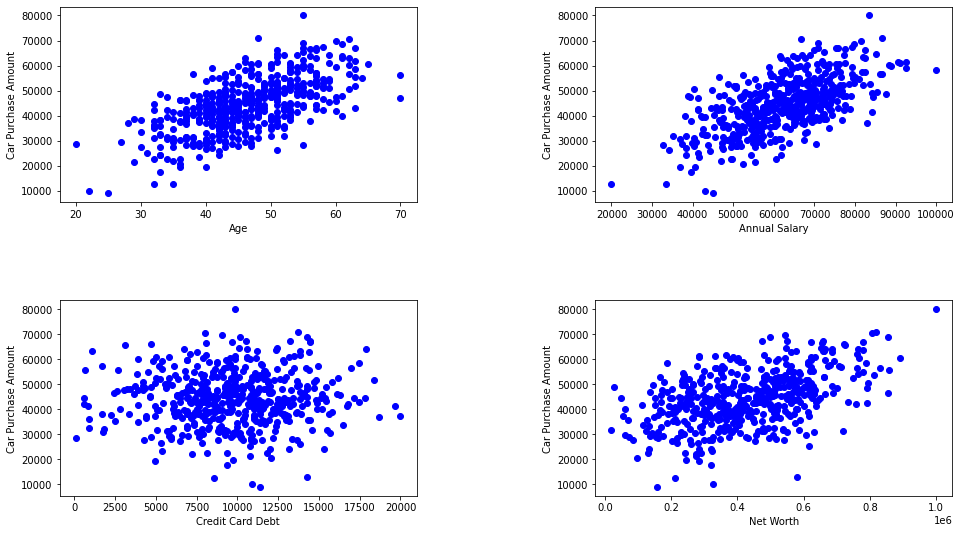

In [ ]:
plt.subplot(221)
plt.scatter(newuserData["Age"], newuserData["Car Purchase Amount"], color="blue")
plt.xlabel("Age")
plt.ylabel("Car Purchase Amount")

plt.subplot(222)
plt.scatter(newuserData["Annual Salary"], newuserData["Car Purchase Amount"], color="blue")
plt.xlabel("Annual Salary")
plt.ylabel("Car Purchase Amount")

plt.subplot(223)
plt.scatter(newuserData["Credit Card Debt"], newuserData["Car Purchase Amount"], color="blue")
plt.xlabel("Credit Card Debt")
plt.ylabel("Car Purchase Amount")

plt.subplot(224)
plt.scatter(newuserData["Net Worth"], newuserData["Car Purchase Amount"], color="blue")
plt.xlabel("Net Worth")
plt.ylabel("Car Purchase Amount")

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Regression - Listing Count

In [ ]:
train, test = train_test_split(newuserData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["Annual Salary"]], train[["Car Purchase Amount"]])
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[0.55824782]]
Intercept:  [9523.54825577]


Visualise the regression to the plot

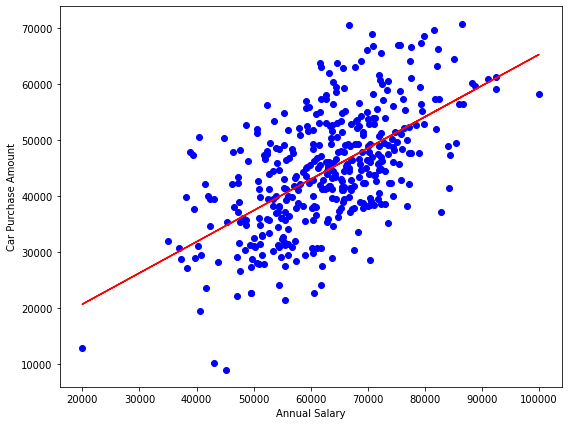

In [ ]:
plt.scatter(train["Annual Salary"], train["Car Purchase Amount"],  color='blue')
plt.plot(train[["Annual Salary"]], regression.coef_ * train[["Annual Salary"]] + regression.intercept_, '-r')
plt.xlabel("Annual Salary")
plt.ylabel("Car Purchase Amount")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

Make the visualisation easier with Seaborn Package

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


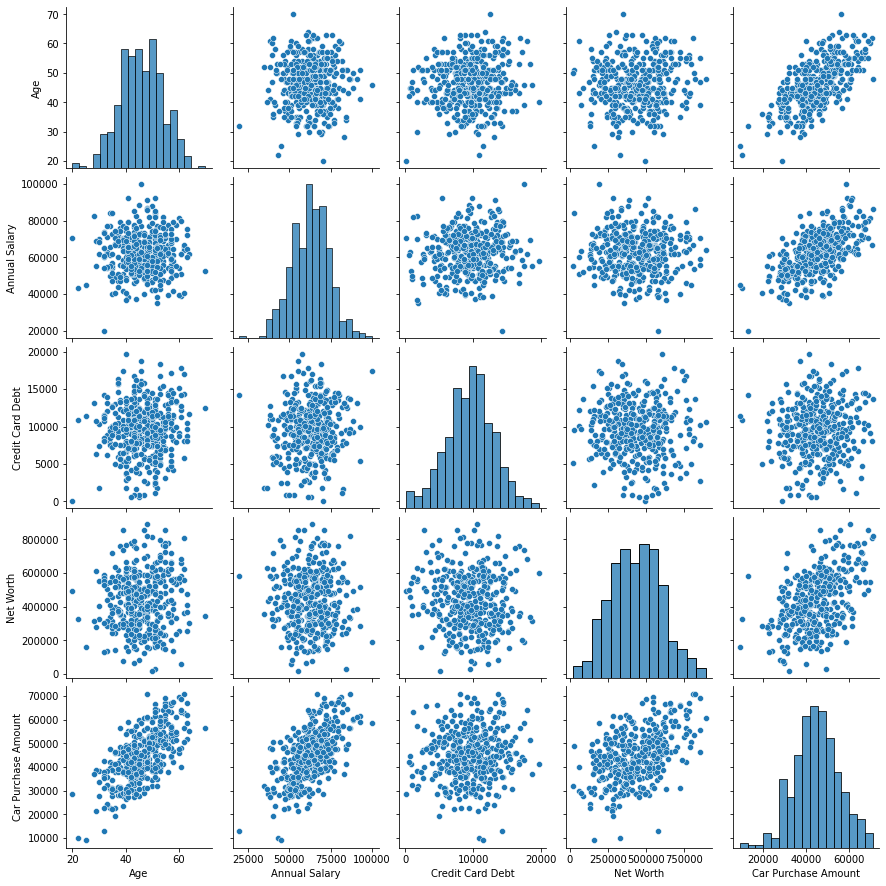

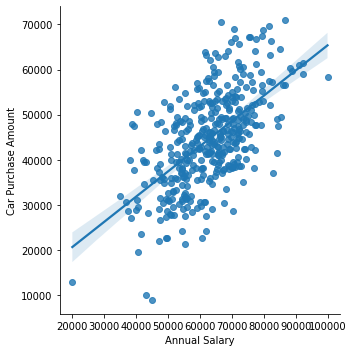

In [ ]:
sb.pairplot(train)
sb.lmplot("Annual Salary", "Car Purchase Amount", data = train)
plt.show()

Predict new data & evaluate the model

In [ ]:
prediction = regression.predict(test[["Annual Salary"]])
# for i in range(len(test)):
  # print(test[["calculated_host_listings_count"]].values[i], prediction[i])

print("MAE : ", mean_absolute_error(test[["Car Purchase Amount"]], prediction))
print("MSE : ", mean_squared_error(test[["Car Purchase Amount"]], prediction))
print("R2 : ", r2_score(test[["Car Purchase Amount"]], prediction))


MAE :  6729.968997247324
MSE :  68553117.3318337
R2 :  0.46755235814990337
